In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path='GlobalLandTemperaturesByCity.csv'
df=pd.read_csv(path)

In [7]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
df.shape

(8599212, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [19]:
df['dt']=pd.to_datetime(df['dt'])

In [20]:
df['Year']=df['dt'].dt.year

In [21]:
df['AverageTemperature'].mean()

16.72743263625063

In [22]:
df['AverageTemperature'].mode()

0    26.544
Name: AverageTemperature, dtype: float64

In [23]:
df['AverageTemperature'].median()

18.831

### 1) Line plot

##### Average temperature in a city changed over the year 
###### Use Case: Analyze trends in time-series data

In [24]:
df['AverageTemperature'].isnull().sum()

364130

In [25]:
city=df.loc[df['City']=='New York'].copy()

In [26]:
len(df['City'].unique())

3448

In [27]:
annual_avg_temp=city.groupby('Year')['AverageTemperature'].mean()


In [28]:
years=city['Year'].unique()
years

array([1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753,
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764,
       1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775,
       1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786,
       1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808,
       1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819,
       1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830,
       1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1888, 1889, 1890, 1891, 1892, 18

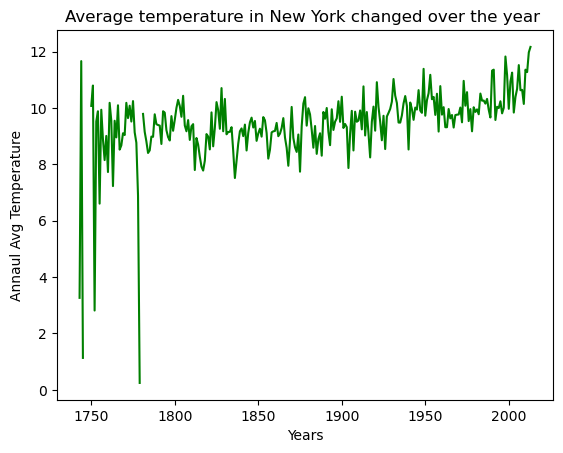

In [29]:
plt.plot(years,annual_avg_temp,color='green')
plt.xlabel('Years')
plt.ylabel('Annaul Avg Temperature')
plt.title('Average temperature in New York changed over the year ')
plt.show()

In [30]:
import plotly.express as px

In [1]:
# px.line(city,x=years,y=annual_avg_temp)

## 2) Bar plot
#### Which countries had the highest average temparature in the dataset

In [84]:
avg_temp_country=df.groupby('Country')['AverageTemperature'].mean()
top_countries=avg_temp_country.sort_values(ascending=False).head(10)
top_countries

Country
Djibouti         29.152790
Niger            28.145552
Sudan            28.072831
Burkina Faso     27.815295
Mali             27.590491
Chad             27.189829
Guinea Bissau    27.057185
Mauritania       27.021905
Benin            26.975880
Cambodia         26.918136
Name: AverageTemperature, dtype: float64

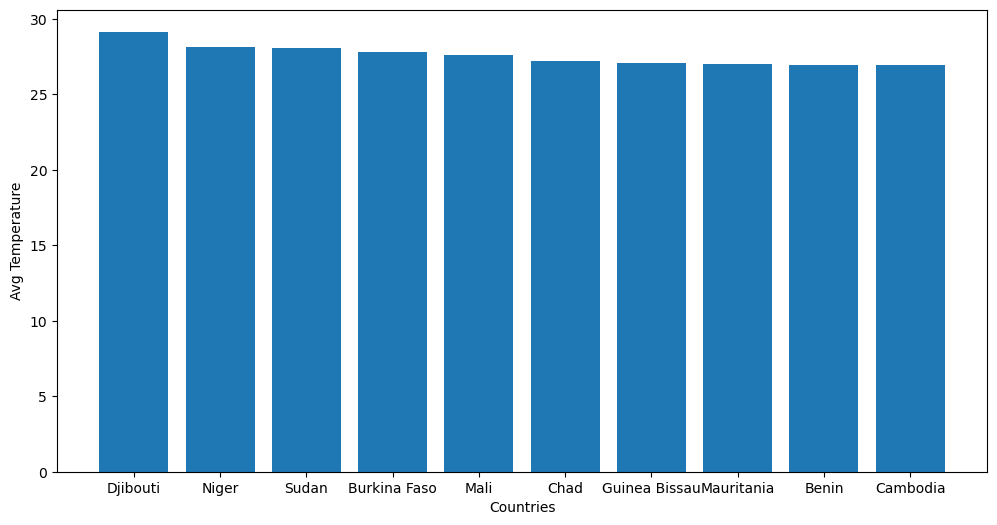

In [88]:
plt.figure(figsize=(12,6))
plt.bar(top_countries.index,top_countries.values)
plt.xlabel('Countries')
plt.ylabel('Avg Temperature')
plt.show()

In [2]:
# px.bar(x=top_countries.index,y=top_countries.values)

## 3) Histogram

In [107]:
avg_temp=df['AverageTemperature'].dropna()
avg_temp

0           6.068
5           5.788
6          10.644
7          14.051
8          16.082
            ...  
8599206     7.710
8599207    11.464
8599208    15.043
8599209    18.775
8599210    18.025
Name: AverageTemperature, Length: 8235082, dtype: float64

In [92]:
df['AverageTemperature'].dropna()

0           6.068
5           5.788
6          10.644
7          14.051
8          16.082
            ...  
8599206     7.710
8599207    11.464
8599208    15.043
8599209    18.775
8599210    18.025
Name: AverageTemperature, Length: 8235082, dtype: float64

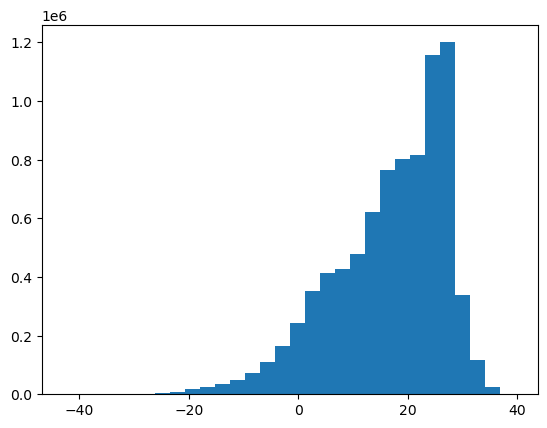

In [103]:
# freq=[1,2,3,4]
plt.hist(avg_temp,bins=30)
plt.show()

In [3]:
# fig=px.histogram(avg_temp)

# fig.show()

In [104]:
import seaborn as sns

<Axes: xlabel='AverageTemperature', ylabel='Count'>

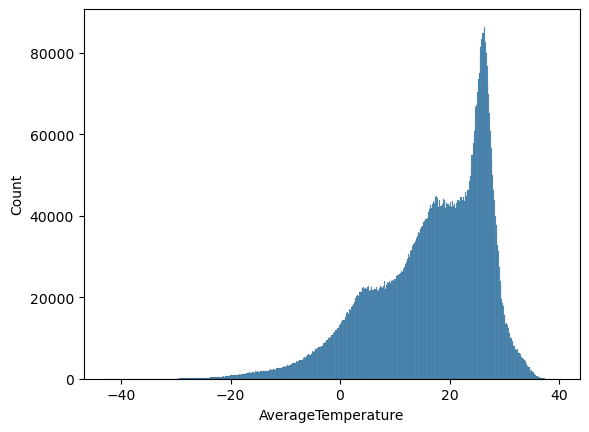

In [109]:
sns.histplot(avg_temp)

## 4) Scatter plot
#### Is there a correlation between temperature and uncertanity in dataset

In [ ]:
# AverageTemperature             
 # AverageTemperatureUncertainty 

In [9]:
avg_temp=df['AverageTemperature'].dropna()  # df[['AverageTemperatureUncertainty','AverageTemperature']].dropna()
avg_temp.shape

(8235082,)

In [8]:
temp_un=df['AverageTemperatureUncertainty'].dropna()

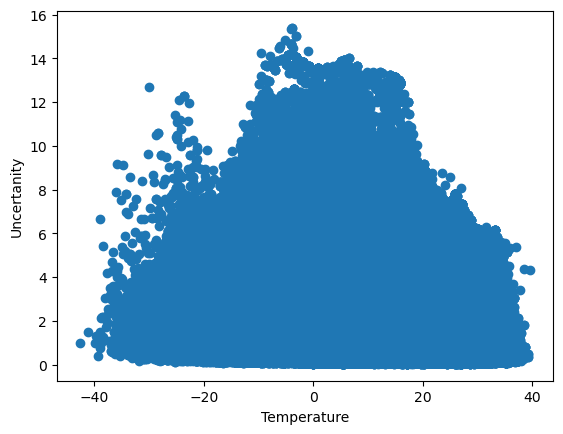

In [11]:
plt.scatter(avg_temp,temp_un)
plt.xlabel('Temperature')
plt.ylabel('Uncertanity')
plt.show()

## 5) Box plot
**what is the spread of temperature for a specific country over a given period**

In [36]:
country_india=df[df['Country']=='India']
country_india

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
49880,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E,1816
49881,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E,1816
49882,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E,1816
49883,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E,1816
49884,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E,1816
...,...,...,...,...,...,...,...,...
8385505,2013-05-01,29.286,0.516,Yelahanka,India,13.66N,76.79E,2013
8385506,2013-06-01,25.401,0.400,Yelahanka,India,13.66N,76.79E,2013
8385507,2013-07-01,24.232,0.323,Yelahanka,India,13.66N,76.79E,2013
8385508,2013-08-01,24.493,0.366,Yelahanka,India,13.66N,76.79E,2013


In [46]:
country=country_india.dropna(subset='AverageTemperature').reset_index(drop=True)
country

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1816-03-01,19.934,2.258,Abohar,India,29.74N,73.85E,1816
1,1816-04-01,26.641,3.398,Abohar,India,29.74N,73.85E,1816
2,1816-05-01,32.535,2.408,Abohar,India,29.74N,73.85E,1816
3,1816-06-01,33.254,2.123,Abohar,India,29.74N,73.85E,1816
4,1816-07-01,31.105,1.848,Abohar,India,29.74N,73.85E,1816
...,...,...,...,...,...,...,...,...
960543,2013-04-01,29.800,0.375,Yelahanka,India,13.66N,76.79E,2013
960544,2013-05-01,29.286,0.516,Yelahanka,India,13.66N,76.79E,2013
960545,2013-06-01,25.401,0.400,Yelahanka,India,13.66N,76.79E,2013
960546,2013-07-01,24.232,0.323,Yelahanka,India,13.66N,76.79E,2013


In [63]:
avg_temp=country.groupby('Year')['AverageTemperature'].mean()

avg_temp

Year
1796    25.444699
1797    26.594590
1798    25.054708
1799    25.723100
1800    25.693772
          ...    
2009    26.603119
2010    26.549878
2011    25.880499
2012    26.191226
2013    26.864186
Name: AverageTemperature, Length: 213, dtype: float64

In [79]:
# [avg_temp.values[i:i+1] for i in range(len(avg_temp)-1)]

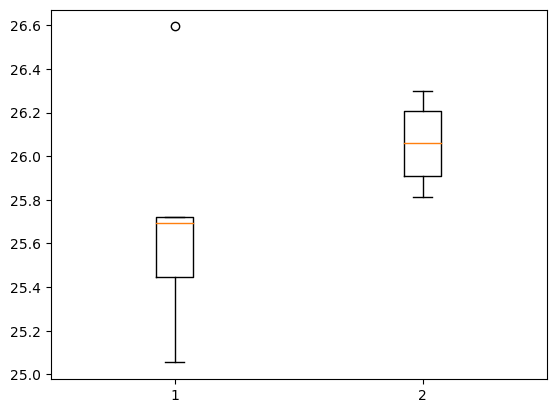

In [78]:
plt.boxplot([avg_temp.values[:5],avg_temp.values[6:10]])
plt.show()